In [2]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from os import path, makedirs
from importlib import reload

import stitching3 as st

In [10]:
folder        = "input/147/1/original"
output_folder = "ipnut/stiching"
new_width     = 2560
print(f"Directorio de entrada: {folder}")
print(f"Directorio de salida: {output_folder}")
images = st.load_and_resize_images(folder, new_width)

Directorio de entrada: input/147/1/original
Directorio de salida: ipnut/stiching
Error al cargar la imagen: 0001.jpg. Saltando.


[ WARN:0@175.477] global loadsave.cpp:241 findDecoder imread_('input/147/1/original/0001.jpg'): can't open/read file: check file path/integrity


Shape (3840, 2560, 3)


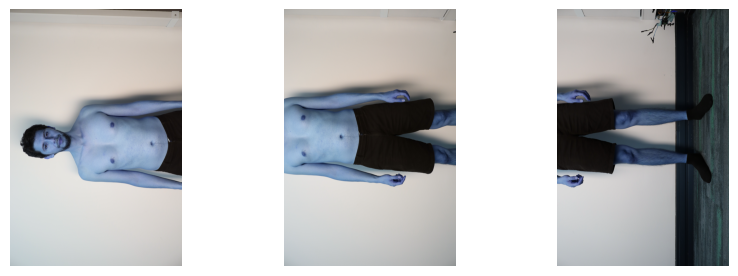

In [4]:
n_images = len(images)
fig, ax = plt.subplots(1, n_images, figsize=(10, 10/n_images))
for k, image in enumerate(images):
    ax[k].imshow(image)
    ax[k].axis('off')
print("Shape", images[0].shape)

In [42]:
reload(st)

<module 'stitching3' from '/home/seba2411/Documentos/ZoeDepth_seb/stitching3.py'>

In [5]:
if len(images) < 2:
    print("No hay suficientes imagenes para unir. Saliendo.")
else:
    stitcher = st.Stitcher()
    (result12, vis12)   = stitcher.stitch([images[1], images[2]], showMatches=True)
    (result123, vis123) = stitcher.stitch([images[0], result12], showMatches=True)


In [6]:
stitcher.kpsB

array([[ 220.     , 2139.     ],
       [2410.     ,   31.     ],
       [2517.     ,   32.     ],
       ...,
       [ 243.65637, 1802.3405 ],
       [ 200.65819, 1877.5873 ],
       [2364.9001 , 2450.8965 ]], dtype=float32)

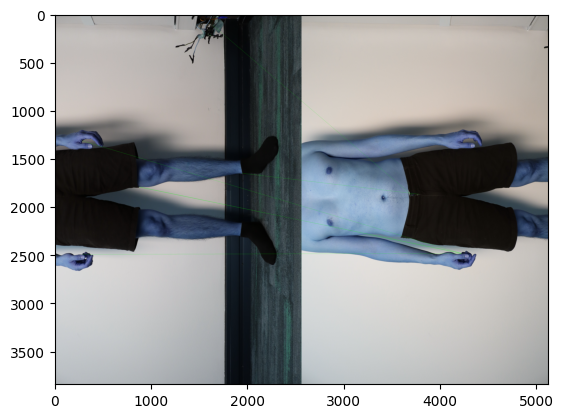

In [7]:
plt.imshow(vis12)

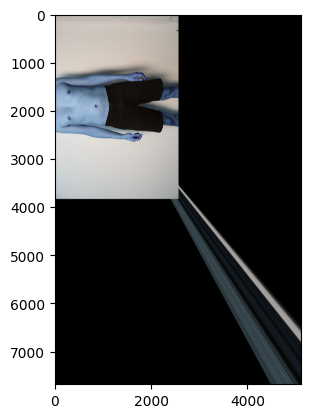

In [8]:
plt.imshow(result12)

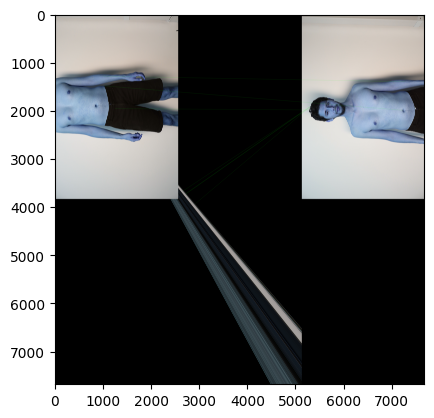

In [9]:
plt.imshow(vis123)

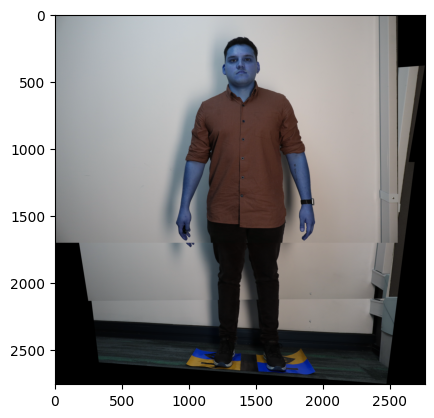

In [33]:
plt.imshow(result123)

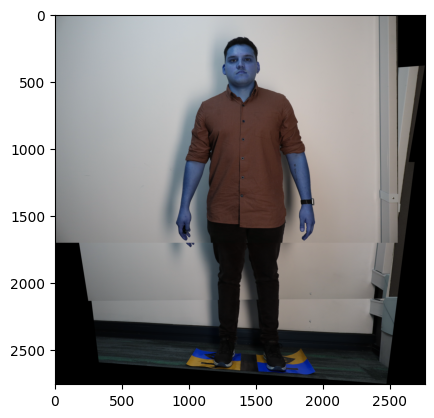

In [34]:
result_cropped = st.crop_black_borders(result123)
result_cropped2 = result_cropped[:, :images[0].shape[1]]
plt.imshow(result_cropped)

In [35]:
result_cropped = st.crop_black_borders(result123)
result_cropped2 = result_cropped[:, :images[0].shape[1]]


if not path.exists(output_folder):
    makedirs(output_folder)
output_path = path.join(output_folder, "147_1.jpg")
# cv2.imwrite(output_folder + "vis_match1.jpg", vis12)
# cv2.imwrite(output_folder + "vis_match2.jpg", vis123)
# cv2.imwrite(output_path, result_cropped2)
# print(f"Imagen guardada en: {output_path}")
